<a href="https://colab.research.google.com/github/Keeming99/Traffic-Prediction-using-R/blob/main/TrafficPrediction_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Prediction






Done By: Huang Kee Ming

##Objective
This project aims to optimize traffic light timings dynamically, resulting in a more efficient and streamlined traffic flow that significantly reduces congestion and enhances the overall commuting experience for all road users by:


1.   Developing a robust classification system categorizing traffic situations into distinct levels (low, medium, high, and heavy).

2.   Employing predictive modeling to accurately forecast the number of vehicles on the roads at specific times.

##DATA SCIENCE PROCESS
a. Understand the data

b.Create initial questions

c.Data Preprocessing

d.Exploratory data analysis

e.Model Development

f.Model Evaluation

Import Dataset and load libraries.

#Data Prepocessing

##1) Data Preparation

###a) Import & Quick Explore on Traffic Dataset

In [ ]:
#Read Dataset
library(dplyr)
traffic_df <- read.csv("/content/Traffic.csv")
glimpse(traffic_df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 2,976
Columns: 9
$ Time              <chr> "12:00:00 AM", "12:15:00 AM", "12:30:00 AM", "12:45:…
$ Date              <int> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, …
$ Day.of.the.week   <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "Tuesday…
$ CarCount          <int> 31, 49, 46, 51, 57, 44, 37, 42, 51, 34, 45, 45, 50, …
$ BikeCount         <int> 0, 0, 0, 0, 6, 0, 0, 4, 0, 0, 0, 0, 0, 0, 22, 16, 28…
$ BusCount          <int> 4, 3, 3, 2, 15, 5, 1, 4, 9, 4, 1, 1, 3, 4, 42, 49, 2…
$ TruckCount        <int> 4, 3, 6, 5, 16, 4, 4, 5, 7, 7, 1, 3, 0, 4, 1, 0, 3, …
$ Total             <int> 39, 55, 55, 58, 94, 53, 42, 55, 67, 45, 47, 49, 53, …
$ Traffic.Situation <chr> "low", "low", "low", "low", "normal", "low", "low", …


In [ ]:
head(traffic_df)

,Time,Date,Day.of.the.week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic.Situation
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
1,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
2,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
3,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
4,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
5,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
6,1:15:00 AM,10,Tuesday,44,0,5,4,53,low


###b)Data Cleaning

**To identify the incorrect, incomplete, inaccurate, irrelevant or missing part of the data and modify, replace or delete them when necessary.**





Replace any ” ” to NA

In [ ]:
cnames<-names(traffic_df)
for (i in cnames){
  print(paste(i,sum(traffic_df[i]=="" )))
  traffic_df[which(traffic_df[i]==""),i]<-NA
}


[1] "Time 0"
[1] "Date 0"
[1] "Day.of.the.week 0"
[1] "CarCount 0"
[1] "BikeCount 0"
[1] "BusCount 0"
[1] "TruckCount 0"
[1] "Total 0"
[1] "Traffic.Situation 0"


Check if there is any Null Value

In [ ]:
# Check for missing values and sum them up for each column
colSums(is.na(traffic_df))

Time              Date   Day.of.the.week          CarCount 
                0                 0                 0                 0 
        BikeCount          BusCount        TruckCount             Total 
                0                 0                 0                 0 
Traffic.Situation 
                0

###c) Data Conversion

**To convert time from string to time format using lubridate**

Create new column for hour , minute, AM/PM


In [ ]:
library(lubridate)
traffic_df$Time_hms<- hms(traffic_df$Time)
traffic_df$Time <- as.POSIXct(strptime(traffic_df$Time, format = "%I:%M:%S %p"))

# Create columns for hour, minute, and AM/PM
traffic_df <- traffic_df %>%
  mutate(
    hour = hour(Time),        # Hour in separate column
    minute = minute(Time),    # Minute in separate column
    am_pm = ifelse(hour(Time) < 12, 1, 2)  # 1 for AM, 2 for PM
  )

head(traffic_df)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,Time,Date,Day.of.the.week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic.Situation,Time_hms,hour,minute,am_pm
,<dttm>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<Period>,<int>,<int>,<dbl>
1,2024-06-18 00:00:00,10,Tuesday,31,0,4,4,39,low,12H 0M 0S,0,0,1
2,2024-06-18 00:15:00,10,Tuesday,49,0,3,3,55,low,12H 15M 0S,0,15,1
3,2024-06-18 00:30:00,10,Tuesday,46,0,3,6,55,low,12H 30M 0S,0,30,1
4,2024-06-18 00:45:00,10,Tuesday,51,0,2,5,58,low,12H 45M 0S,0,45,1
5,2024-06-18 01:00:00,10,Tuesday,57,6,15,16,94,normal,1H 0M 0S,1,0,1
6,2024-06-18 01:15:00,10,Tuesday,44,0,5,4,53,low,1H 15M 0S,1,15,1


###d) Data transformation

**To convert or modify raw data into a suitable format or structure for analysis**

To create factor on numeric, and sort the ordinal variable

In [ ]:
traffic_df %>%
  count(`Day.of.the.week`)


Day.of.the.week,n
<chr>,<int>
Friday,384
Monday,384
Saturday,384
Sunday,384
Thursday,480
Tuesday,480
Wednesday,480


In [ ]:
traffic_df$'Day.of.the.week' = factor(traffic_df$'Day.of.the.week', levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

traffic_df$DayofWeek_Numeric = as.numeric(traffic_df$'Day.of.the.week')


traffic_df$'Traffic.Situation' = factor(traffic_df$'Traffic.Situation', levels = c("low", "normal", "high", "heavy"))

traffic_df$Traffic_Situation_Numeric = as.numeric(traffic_df$'Traffic.Situation')


head(traffic_df)

,Time,Date,Day.of.the.week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic.Situation,Time_hms,hour,minute,am_pm,DayofWeek_Numeric,Traffic_Situation_Numeric
,<dttm>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<Period>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2024-06-18 00:00:00,10,Tuesday,31,0,4,4,39,low,12H 0M 0S,0,0,1,2,1
2,2024-06-18 00:15:00,10,Tuesday,49,0,3,3,55,low,12H 15M 0S,0,15,1,2,1
3,2024-06-18 00:30:00,10,Tuesday,46,0,3,6,55,low,12H 30M 0S,0,30,1,2,1
4,2024-06-18 00:45:00,10,Tuesday,51,0,2,5,58,low,12H 45M 0S,0,45,1,2,1
5,2024-06-18 01:00:00,10,Tuesday,57,6,15,16,94,normal,1H 0M 0S,1,0,1,2,2
6,2024-06-18 01:15:00,10,Tuesday,44,0,5,4,53,low,1H 15M 0S,1,15,1,2,1


# 2)Exploratory Data Analysis

To check on summary statistic of each column

In [ ]:
summary(traffic_df)


      Time                          Date     Day.of.the.week    CarCount    
 Min.   :2024-06-18 00:00:00   Min.   : 1   Monday   :384    Min.   :  6.0  
 1st Qu.:2024-06-18 05:56:15   1st Qu.: 8   Tuesday  :480    1st Qu.: 19.0  
 Median :2024-06-18 11:52:30   Median :16   Wednesday:480    Median : 64.0  
 Mean   :2024-06-18 11:52:30   Mean   :16   Thursday :480    Mean   : 68.7  
 3rd Qu.:2024-06-18 17:48:45   3rd Qu.:24   Friday   :384    3rd Qu.:107.0  
 Max.   :2024-06-18 23:45:00   Max.   :31   Saturday :384    Max.   :180.0  
                                            Sunday   :384                   
   BikeCount        BusCount       TruckCount        Total      
 Min.   : 0.00   Min.   : 0.00   Min.   : 0.00   Min.   : 21.0  
 1st Qu.: 5.00   1st Qu.: 1.00   1st Qu.: 6.00   1st Qu.: 55.0  
 Median :12.00   Median :12.00   Median :14.00   Median :109.0  
 Mean   :14.92   Mean   :15.28   Mean   :15.32   Mean   :114.2  
 3rd Qu.:22.00   3rd Qu.:25.00   3rd Qu.:23.00   3rd Qu.:16

###a) The Relationship between Traffic Situation and Total Vehicles

The total vehicles are categorized and ranked as follows, with mean values for each category: Low (65), Normal (83), High(142) and Heavy (199).

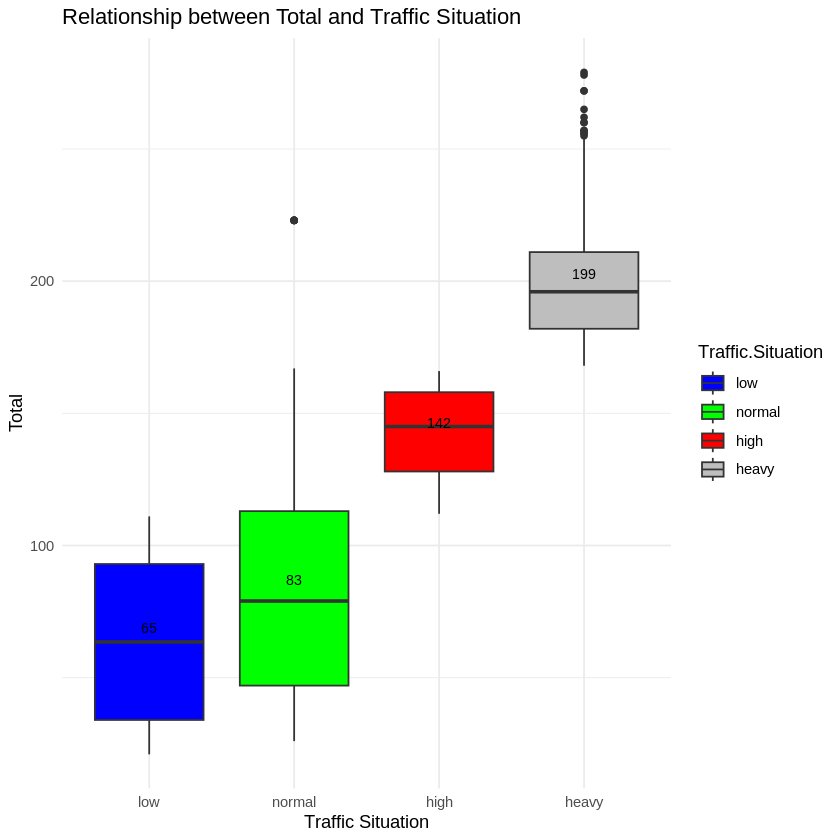

In [ ]:
library(ggplot2)

mean_values <- traffic_df %>%
  group_by(`Traffic.Situation`) %>%
  summarize(mean_total = mean(Total))

ggplot(traffic_df, aes(x = `Traffic.Situation`, y = Total, fill = `Traffic.Situation`)) +
  geom_boxplot() +
  geom_text(data = mean_values, aes(x = `Traffic.Situation`, y = mean_total, label = round(mean_total, 0)),
            vjust = -0.5, color = "black", size = 3, position = position_dodge(width = 0.75)) +
  labs(title = "Relationship between Total and Traffic Situation",
       x = "Traffic Situation",
       y = "Total") +
  scale_fill_manual(values = c("low" = "blue", "normal" = "green", "high" = "red","heavy"="grey")) +
  theme_minimal()

###b) Number of Vehicles on Daily Basis

The overall number of vehicles remains relatively constant throughout the month.



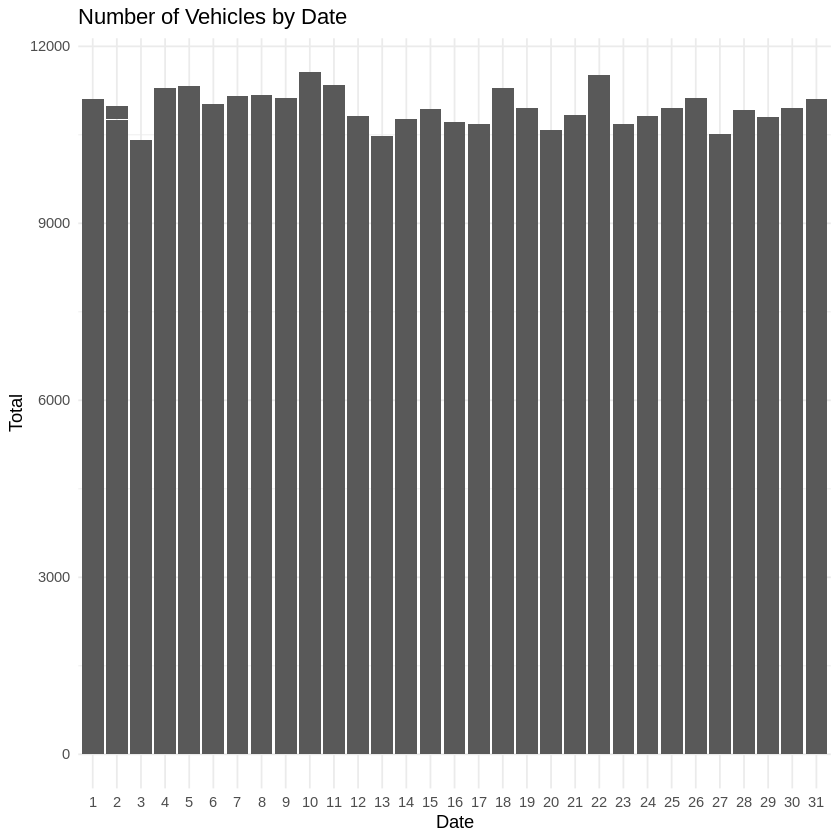

In [ ]:
ggplot(traffic_df, aes(x = factor(Date), y = Total)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Vehicles by Date",
       x = "Date",
       y = "Total") +
  theme_minimal()


###c) Proprotion of Vehicles over Date

Cars constitute a larger portion of the total vehicles, indicating their prevalence compared to other vehicle types. BikeCount is high on every few days.

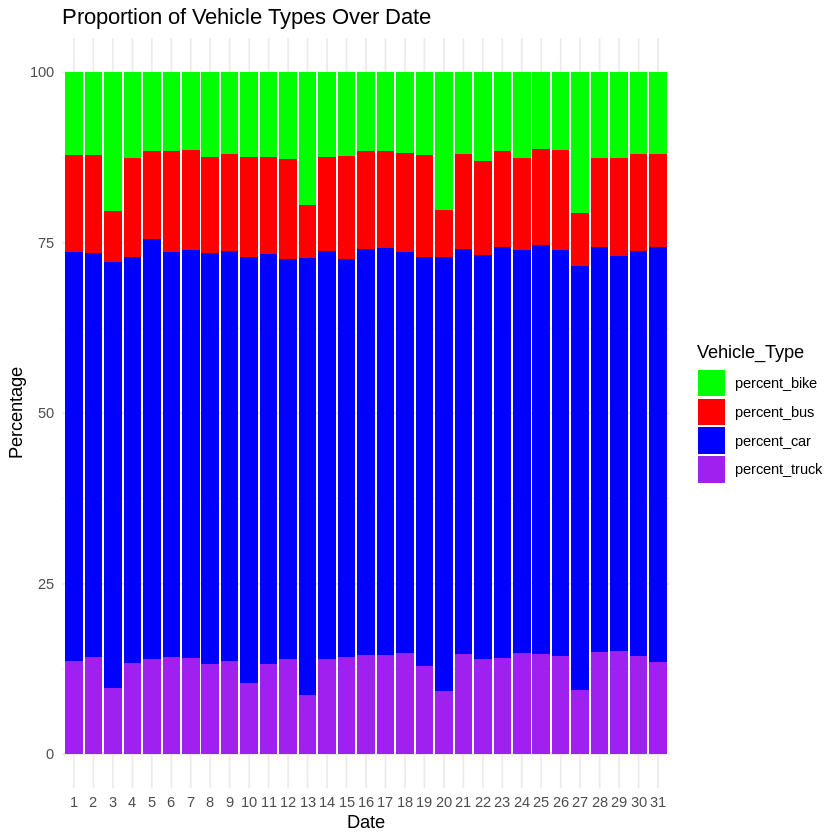

In [ ]:
library(tidyr)

# Calculate proportions
EDA_VehiclebyDate <- traffic_df %>%
  group_by(Date) %>%
  summarize(
    percent_car = sum(CarCount) / sum(Total) * 100,
    percent_bike = sum(BikeCount) / sum(Total) * 100,
    percent_bus = sum(BusCount) / sum(Total) * 100,
    percent_truck = sum(TruckCount) / sum(Total) * 100
  )

# Reshape data for plotting using gather
EDA_VehiclebyDate_Gather <- EDA_VehiclebyDate %>%
  gather(key = "Vehicle_Type", value = "Percentage", -Date)

# Plotting
ggplot(EDA_VehiclebyDate_Gather, aes(x = factor(Date), y = Percentage, fill = Vehicle_Type)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of Vehicle Types Over Date",
       x = "Date",
       y = "Percentage") +
  scale_fill_manual(values = c("percent_car" = "blue", "percent_bike" = "green", "percent_bus" = "red", "percent_truck" = "purple")) +
  theme_minimal()


###d) Proprotion of Vehicles over Day of Week

On Fridays, BikeCount noticeably surges, accompanied by a diminished proportion of larger vehicles such as BusCount and TruckCount.

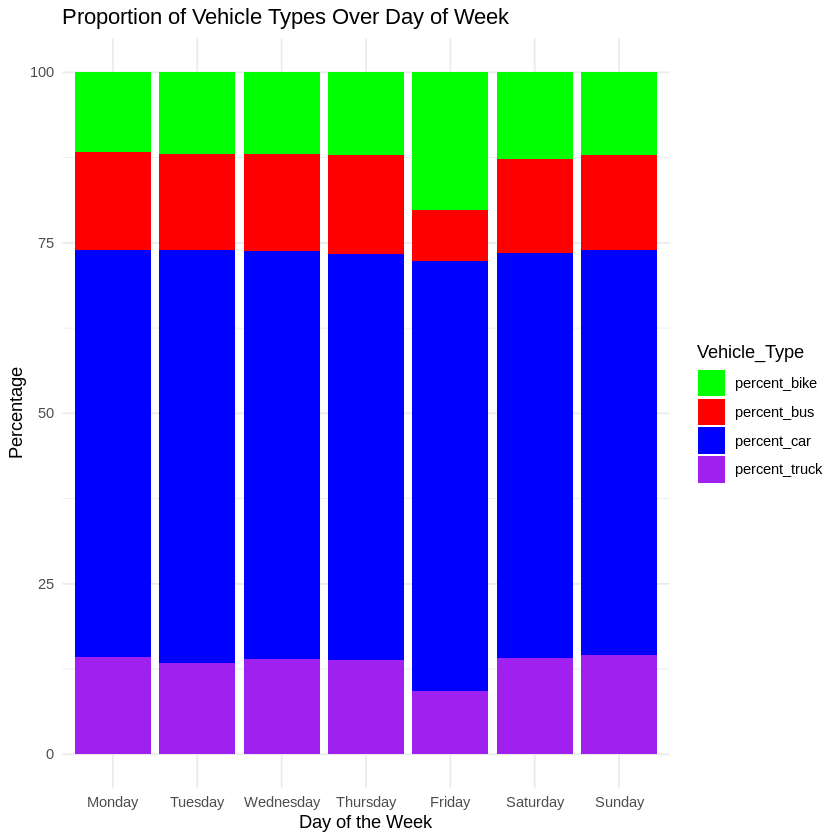

In [ ]:
# Calculate proportions
EDA_VehiclebyDay <- traffic_df %>%
  group_by(Day.of.the.week) %>%
  summarize(
    percent_car = sum(CarCount) / sum(Total) * 100,
    percent_bike = sum(BikeCount) / sum(Total) * 100,
    percent_bus = sum(BusCount) / sum(Total) * 100,
    percent_truck = sum(TruckCount) / sum(Total) * 100
  )

# Reshape data for plotting using gather
EDA_VehiclebyDay_Gather <- EDA_VehiclebyDay %>%
  gather(key = "Vehicle_Type", value = "Percentage", -Day.of.the.week)

# Plotting
ggplot(EDA_VehiclebyDay_Gather, aes(x = factor(Day.of.the.week), y = Percentage, fill = Vehicle_Type)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of Vehicle Types Over Day of Week",
       x = "Day of the Week",
       y = "Percentage") +
  scale_fill_manual(values = c("percent_car" = "blue", "percent_bike" = "green", "percent_bus" = "red", "percent_truck" = "purple")) +
  theme_minimal()


###e) Traffic Situation

The traffic situation pattern is generally similar on both weekdays and weekends. However, there is a notable difference in the total number of vehicles, with more vehicles observed on weekdays compared to weekends.

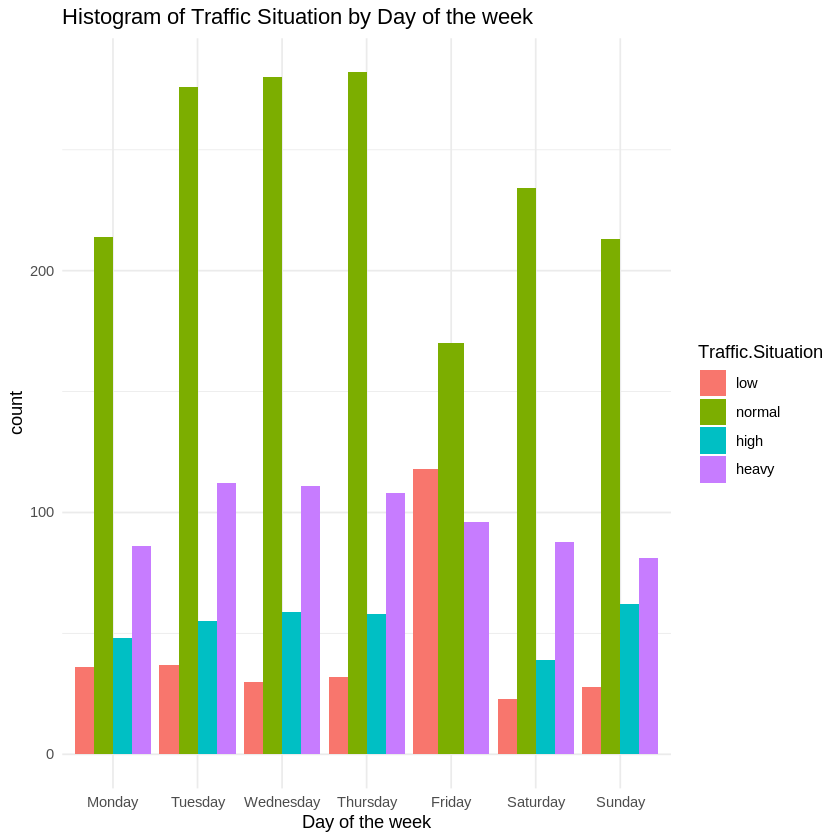

In [ ]:
ggplot(traffic_df, aes(x = Day.of.the.week, fill = `Traffic.Situation`)) +
  geom_bar(position = "dodge") +
  labs(x = "Day of the week") +
  ggtitle("Histogram of Traffic Situation by Day of the week") +
  theme_minimal()

###f) Number of Vehicles on Hour

On an hourly basis, the traffic situation is generally normal during most hours (0000 to 2300). The period from 0600 to 1800 experiences heavier traffic, likely due to working hours.The number of vehicles peaked around 5-8am and 4-6pm

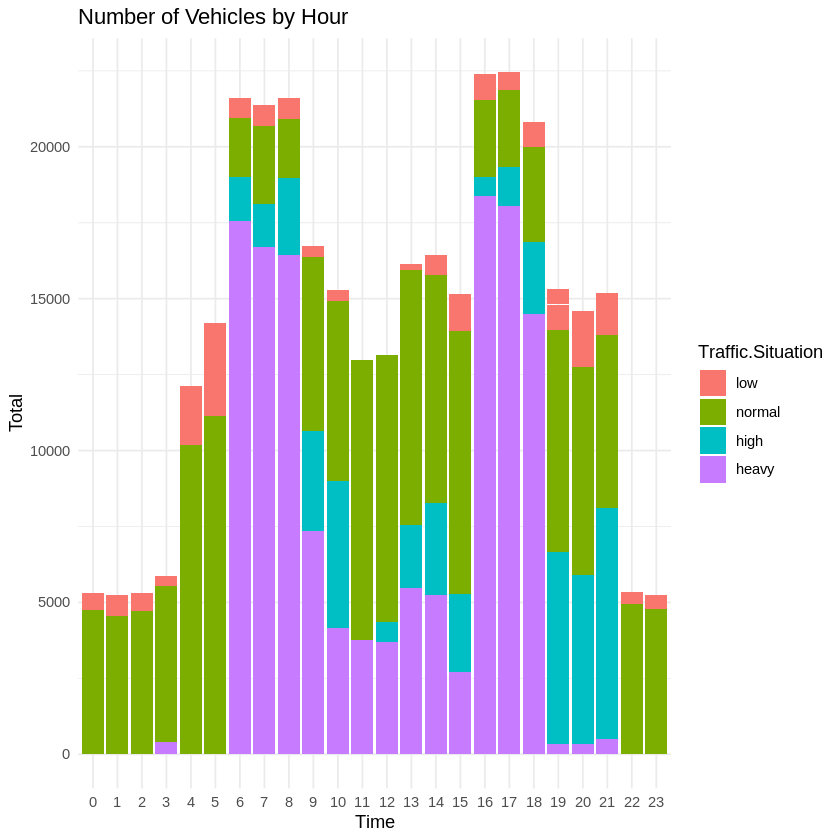

In [ ]:
ggplot(traffic_df, aes(x = factor(hour), y = Total,fill = `Traffic.Situation`)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Vehicles by Hour",
       x = "Time",
       y = "Total") +
  theme_minimal()


###g) Identify the relationship between the variables


The correlation coefficients indicate strong, positive relationships between traffic situation and CarCount (0.69), BikeCount (0.56), BusCount (0.69), Total (0.78).

In [ ]:
selected_cols <- traffic_df[ c('DayofWeek_Numeric', 'Date','CarCount', 'BikeCount', 'BusCount','TruckCount', 'Total', 'hour', 'minute', 'am_pm','Traffic_Situation_Numeric')]


# Computing the correlation matrix
correlation_matrix <- cor(selected_cols,method = "spearman")
correlation_matrix


,DayofWeek_Numeric,Date,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute,am_pm,Traffic_Situation_Numeric
DayofWeek_Numeric,1.000000000,-0.024441186,-0.004679699,0.035196332,-0.0440739400,-0.029521139,-0.011219205,0.000000000,0.0000000000,0.00000000,-0.02543575
Date,-0.024441186,1.000000000,-0.011382575,-0.005270197,-0.0151122132,0.022323732,-0.008937869,0.000000000,0.0000000000,0.00000000,-0.00471838
CarCount,-0.004679699,-0.011382575,1.000000000,0.749585264,0.7545868423,-0.645307877,0.960325256,0.161930232,-0.0023072694,0.11464136,0.69116754
BikeCount,0.035196332,-0.005270197,0.749585264,1.000000000,0.7269200607,-0.608864711,0.818856416,0.198004911,-0.0010204673,0.19186037,0.56093091
BusCount,-0.044073940,-0.015112213,0.754586842,0.726920061,1.0000000000,-0.568699752,0.837282379,0.222642547,0.0009379625,0.17578930,0.68877183
TruckCount,-0.029521139,0.022323732,-0.645307877,-0.608864711,-0.5686997518,1.000000000,-0.552649980,-0.004864151,0.0041548113,0.01764170,-0.29670407
Total,-0.011219205,-0.008937869,0.960325256,0.818856416,0.8372823788,-0.552649980,1.000000000,0.193874934,-0.0061174248,0.14998961,0.77696946
hour,0.000000000,0.000000000,0.161930232,0.198004911,0.2226425469,-0.004864151,0.193874934,1.000000000,0.0000000000,0.86677814,0.11341957
minute,0.000000000,0.000000000,-0.002307269,-0.001020467,0.0009379625,0.004154811,-0.006117425,0.000000000,1.0000000000,0.00000000,-0.02115912
am_pm,0.000000000,0.000000000,0.114641356,0.191860372,0.1757892994,0.017641702,0.149989606,0.866778142,0.0000000000,1.00000000,0.07481169


In [ ]:
# Install the reshape2 package
install.packages("reshape2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’





Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




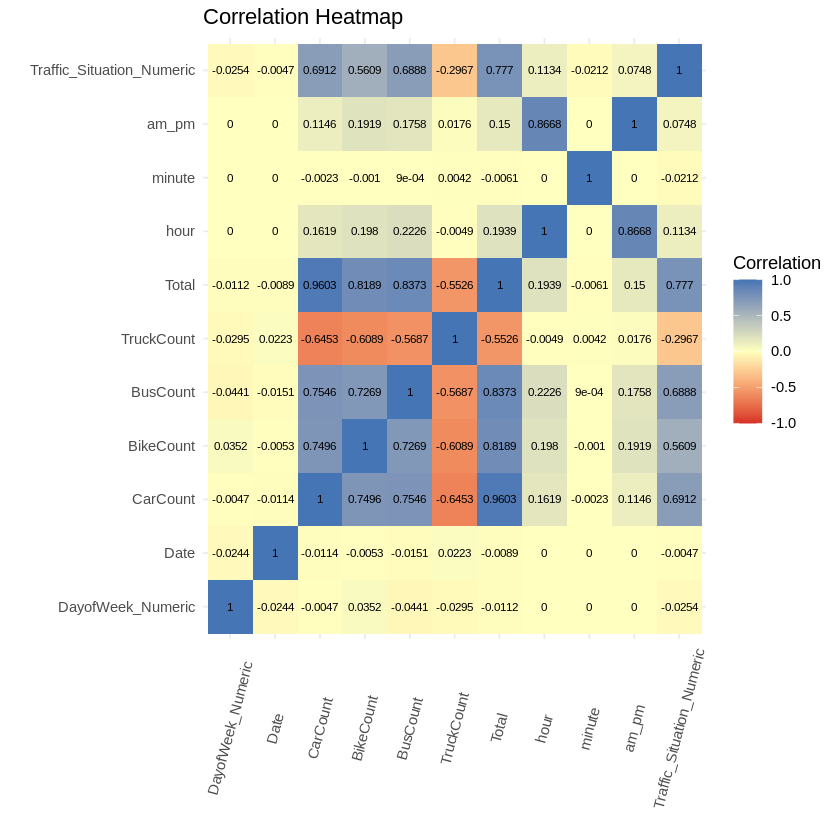

In [ ]:
library(reshape2) # For data manipulation

# Convert correlation matrix to a long format for ggplot
cor_df <- melt(correlation_matrix)

# Plot heatmap using ggplot with rotated x-axis labels
ggplot(cor_df, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#D73027", mid = "#FFFFBF", high = "#4575B4", midpoint = 0,
                       limits = c(-1, 1), name = "Correlation") +
  geom_text(aes(label = round(value, 4)), color = "black", size = 2.45) +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 75, vjust = 0.5))


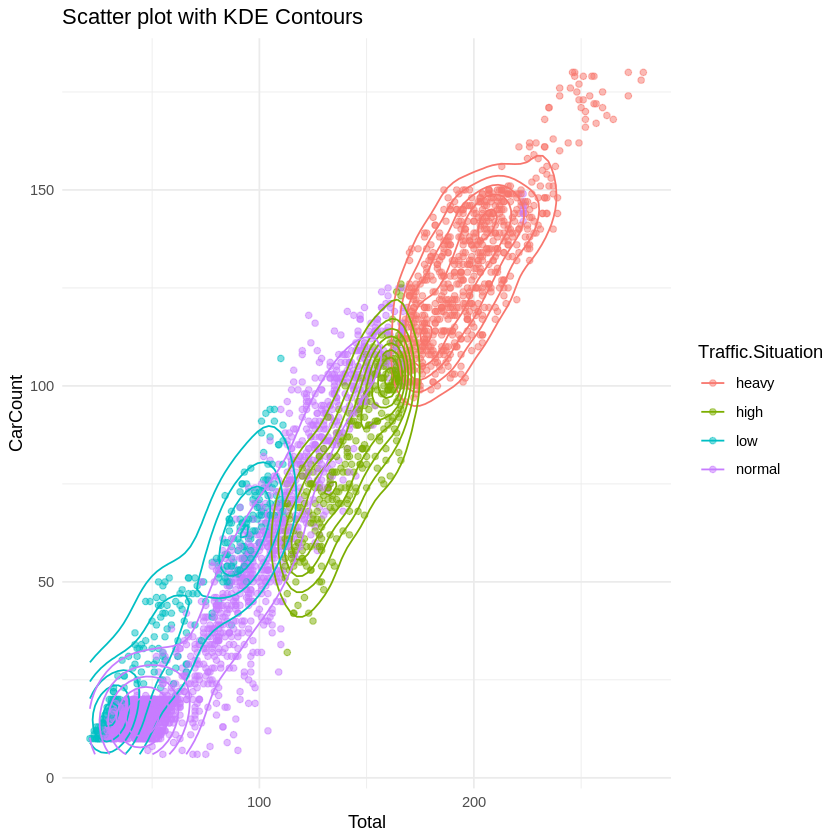

In [ ]:
# Create a scatter plot with KDE contours
ggplot(traffic_df, aes(x = Total, y = CarCount, color = `Traffic.Situation`)) +
  geom_point(alpha = 0.5) +
  geom_density_2d() +
  labs(x = "Total", y = "CarCount") +
  ggtitle("Scatter plot with KDE Contours") +
  theme_minimal()

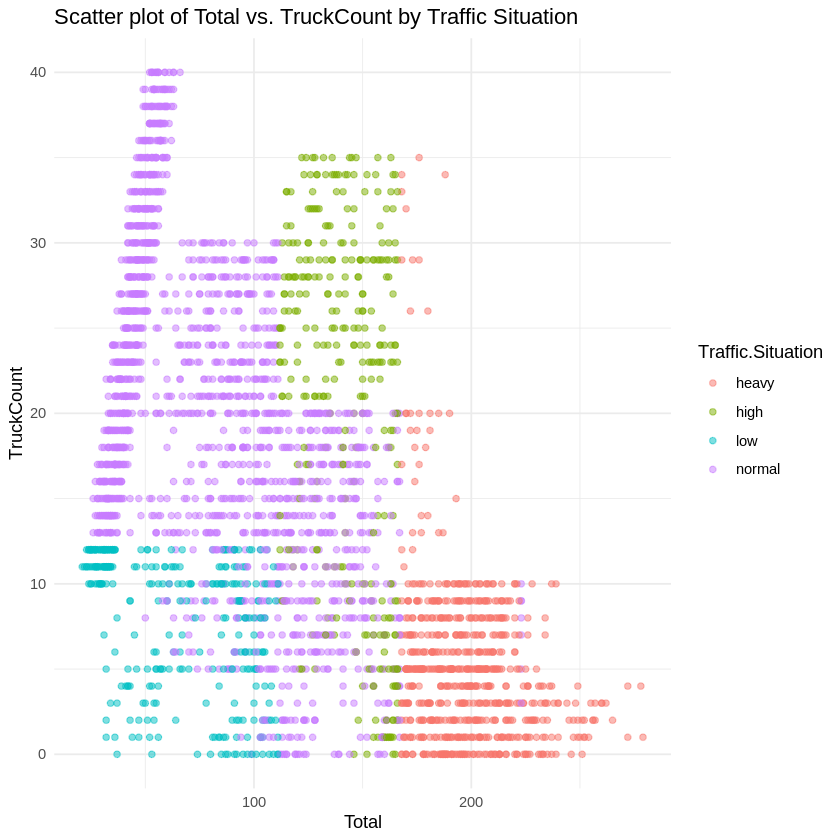

In [ ]:
# Create a scatter plot for Total vs. TruckCount with colors for Traffic Situation
ggplot(traffic_df, aes(x = Total, y = TruckCount, color = `Traffic.Situation`)) +
  geom_point(alpha = 0.5) +
  labs(x = "Total", y = "TruckCount") +
  ggtitle("Scatter plot of Total vs. TruckCount by Traffic Situation") +
  theme_minimal()

##3) Modeling

**a) Classification - Predict Traffic Situation Using Random Forest**

Create Training and Test Set


In [ ]:
# Install the caret package
install.packages("caret")

# Install the randomForest package
install.packages("randomForest")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)
library(randomForest)

set.seed(50)


# Create train-test split using createDataPartition
trainIndex <- createDataPartition(traffic_df$Traffic.Situation, p = 0.7, list = FALSE)

train_data <- traffic_df[trainIndex, ]
test_data <- traffic_df[-trainIndex, ]

table(traffic_df$Traffic.Situation)


Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine





   low normal   high  heavy 
   304   1669    321    682 

**Downsampling due to imbalanced data**

In [ ]:
train_data_down <- downSample(x = train_data[,-ncol(train_data)],
                              y = train_data$Traffic.Situation)

table(train_data_down$Traffic.Situation)


   low normal   high  heavy 
   213    213    213    213 

In [ ]:
#Build the classfication model using randomForest
train_data_down <- subset(train_data_down, select = -c(Class))

# Check the column names in train_data
names(train_data)

[1] "Time"                      "Date"                     
 [3] "Day.of.the.week"           "CarCount"                 
 [5] "BikeCount"                 "BusCount"                 
 [7] "TruckCount"                "Total"                    
 [9] "Traffic.Situation"         "Time_hms"                 
[11] "hour"                      "minute"                   
[13] "am_pm"                     "DayofWeek_Numeric"        
[15] "Traffic_Situation_Numeric"

In [ ]:
# Check the column names in train_data_down
names(train_data_down)

[1] "Time"              "Date"              "Day.of.the.week"  
 [4] "CarCount"          "BikeCount"         "BusCount"         
 [7] "TruckCount"        "Total"             "Traffic.Situation"
[10] "Time_hms"          "hour"              "minute"           
[13] "am_pm"             "DayofWeek_Numeric"

**Build the model using Random Forest**


In [ ]:
#For train data
model.rf = randomForest(Traffic.Situation ~ ., data = train_data,
                        keep.forest = TRUE, ntree = 150)

#For train data down
model_down.rf = randomForest(Traffic.Situation ~ ., data = train_data_down,
                             keep.forest = TRUE, ntree = 150)

**Print the train data model**


In [ ]:
print(model.rf)


Call:
 randomForest(formula = Traffic.Situation ~ ., data = train_data,      keep.forest = TRUE, ntree = 150) 
               Type of random forest: classification
                     Number of trees: 150
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0%
Confusion matrix:
       low normal high heavy class.error
low    213      0    0     0           0
normal   0   1169    0     0           0
high     0      0  225     0           0
heavy    0      0    0   478           0


**Print the downsampling data model**


In [ ]:
print(model_down.rf)


Call:
 randomForest(formula = Traffic.Situation ~ ., data = train_data_down,      keep.forest = TRUE, ntree = 150) 
               Type of random forest: classification
                     Number of trees: 150
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.06%
Confusion matrix:
       low normal high heavy class.error
low    213      0    0     0 0.000000000
normal   1    205    5     2 0.037558685
high     0      0  213     0 0.000000000
heavy    0      0    1   212 0.004694836


**Plot the train data model**

**Plot the error rate to show the class error rate. As the number of tree increases, the error rate approaches zero **


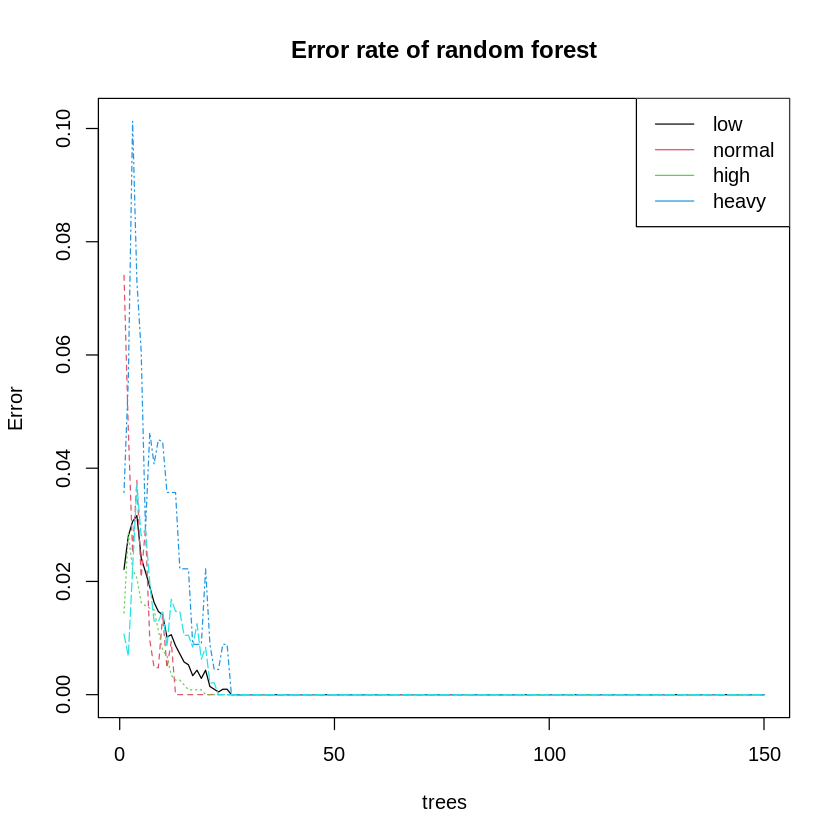

In [ ]:
plot(model.rf, main = "Error rate of random forest")
# Add legend with class labels
legend("topright", legend = levels(train_data$Traffic.Situation), col = 1:4, lty = 1)

**Plot the downsampling data model**

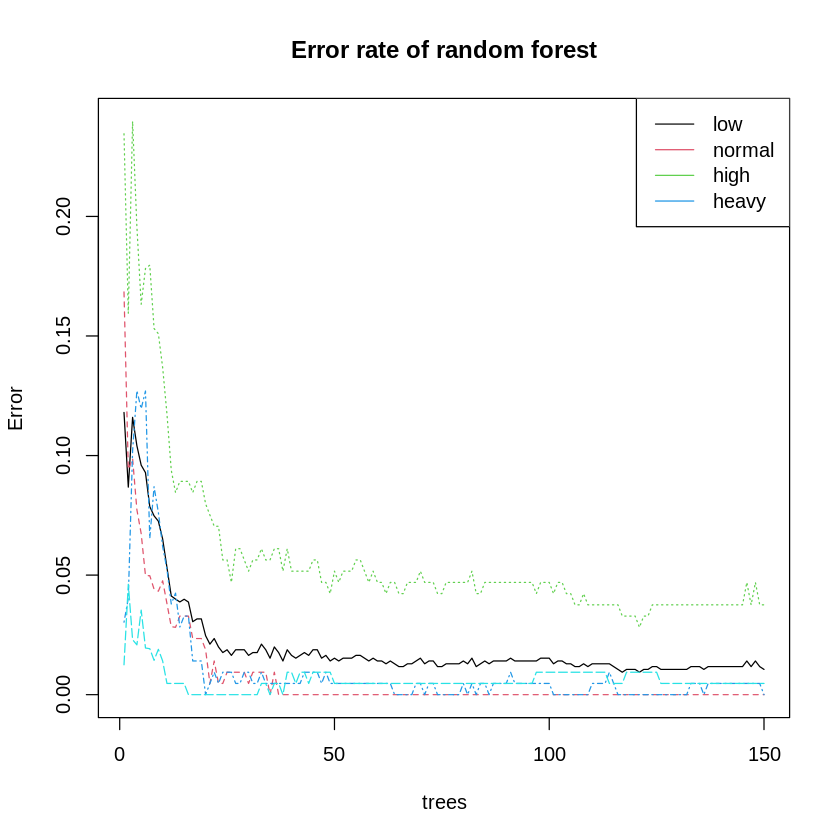

In [ ]:
plot(model_down.rf, main = "Error rate of random forest")
# Add legend with class labels
legend("topright", legend = levels(train_data$Traffic.Situation), col = 1:4, lty = 1)

**Display the importance affecting random forest from greatest to least impact, from Top to Bottom**


**for train data**

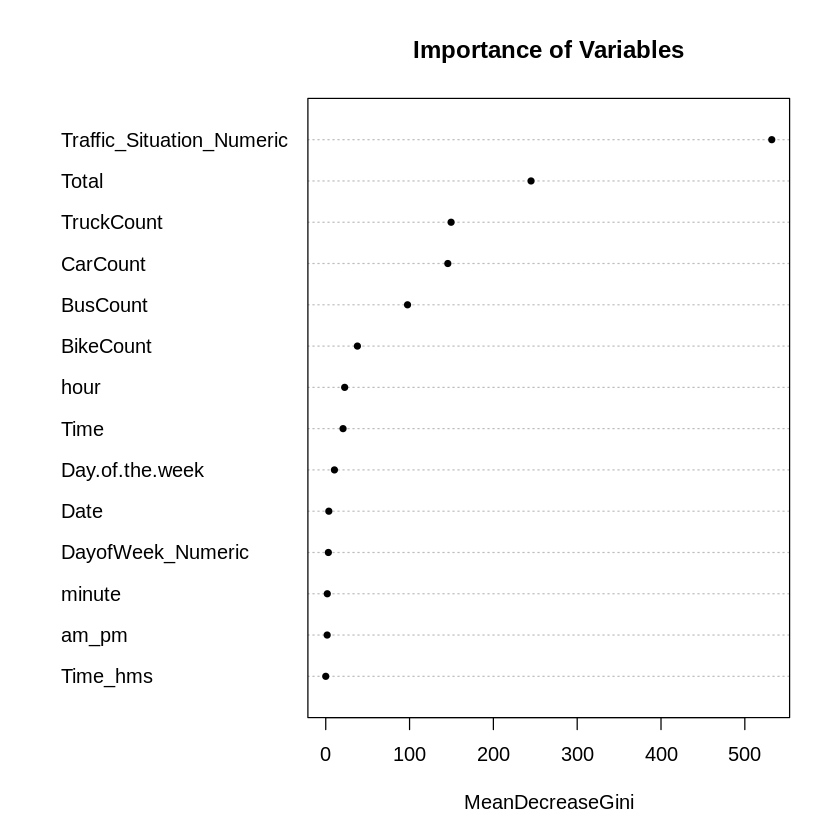

In [ ]:
varImpPlot(model.rf, pch = 20, main = "Importance of Variables")

**for downsampling data**

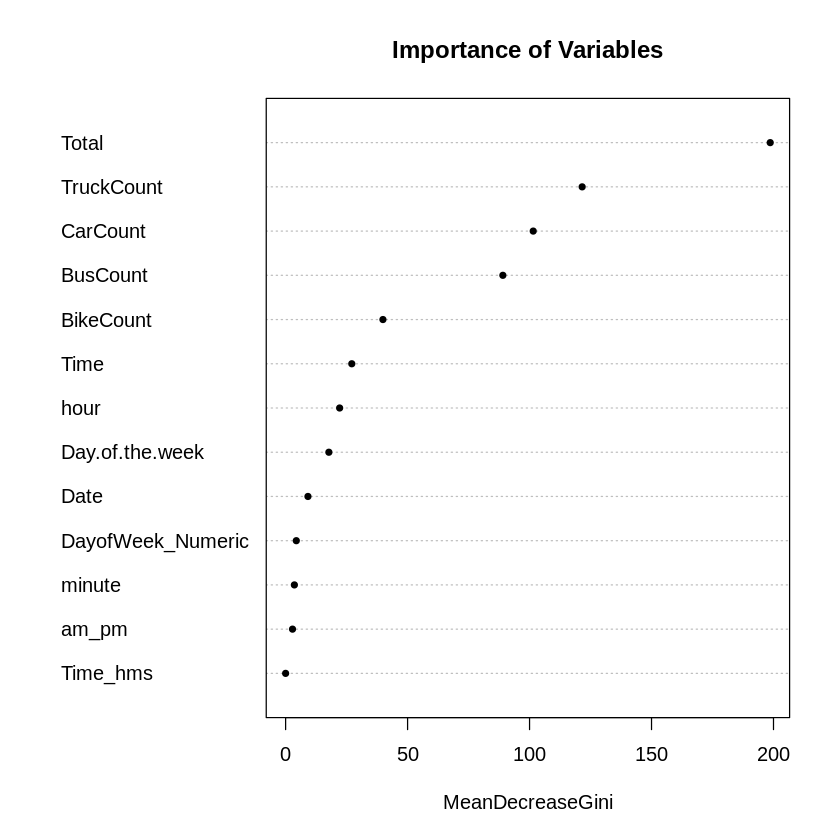

In [ ]:
varImpPlot(model_down.rf, pch = 20, main = "Importance of Variables")

##**Model Evaluation**

**Evaluate the performance of our random forest models by using confusion matrix. First, use the models to make prediction.**

In [ ]:
#For train data
pred_Test_rd = predict(model.rf, test_data[,setdiff(names(test_data),"Traffic.Situation")],
                       type="response",
                       norm.votes=TRUE
)

#For train data down
pred_Test_rd_down = predict(model_down.rf, test_data[,setdiff(names(test_data),"is_canceled")],
                            type="response",
                            norm.votes=TRUE
)

**Confusion metrics for train data**

In [ ]:
tab_Test = table(actual=test_data$Traffic.Situation, predicted=pred_Test_rd);
confusionMatrix(tab_Test, mode = "everything")

Confusion Matrix and Statistics

        predicted
actual   low normal high heavy
  low     91      0    0     0
  normal   0    500    0     0
  high     0      0   96     0
  heavy    0      0    0   204

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9959, 1)
    No Information Rate : 0.5612     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: low Class: normal Class: high Class: heavy
Sensitivity              1.0000        1.0000      1.0000        1.000
Specificity              1.0000        1.0000      1.0000        1.000
Pos Pred Value           1.0000        1.0000      1.0000        1.000
Neg Pred Value           1.0000        1.0000      1.0000        1.000
Precision                1.0000        1.0000      1.0

**Confusion metrics for downsampling**


In [ ]:
tab_Test_down = table(actual=test_data$Traffic.Situation, predicted=pred_Test_rd_down);
confusionMatrix(tab_Test_down,mode="everything")


Confusion Matrix and Statistics

        predicted
actual   low normal high heavy
  low     91      0    0     0
  normal   2    486    8     4
  high     0      0   96     0
  heavy    0      0    1   203

Overall Statistics
                                          
               Accuracy : 0.9832          
                 95% CI : (0.9724, 0.9905)
    No Information Rate : 0.5455          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9727          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: low Class: normal Class: high Class: heavy
Sensitivity              0.9785        1.0000      0.9143       0.9807
Specificity              1.0000        0.9654      1.0000       0.9985
Pos Pred Value           1.0000        0.9720      1.0000       0.9951
Neg Pred Value           0.9975        1.0000      0.9887       0.9942
Precision

###**RF Model Interpretation**

Random Forest Model with Train Data only has higher precision which means it can predict the traffic situation more accurately most of the time while Random Forest Model with Train Data Down has slightly lower precision.

Random Forest Model with Train Data Down has lower recall compare to Random Forest Model with Train Data, which means it has lower percentage of traffic situation that were classified correctly/accurately.

Random Forest Model with Train Data only has higher accuracy and F1 score compared to Random Forest with Train Data Down. Overall,

Random Forest Model with Train Data has better performance compared to Random Forest Model with Train Data Down. In conclusion, Downsampling has not really improved the performance of the model.

##3) Modeling

###b) Regression - Predicting Number of Vehicles(Total)

**Create Training and Test Set**

In [ ]:
trainIndex <- createDataPartition(traffic_df$Total, p = 0.7, list = FALSE)

train_data <- traffic_df[trainIndex, ]
test_data <- traffic_df[-trainIndex, ]

head(train_data)


,Time,Date,Day.of.the.week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic.Situation,Time_hms,hour,minute,am_pm,DayofWeek_Numeric,Traffic_Situation_Numeric
,<dttm>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<Period>,<int>,<int>,<dbl>,<dbl>,<dbl>
2,2024-06-18 00:15:00,10,Tuesday,49,0,3,3,55,low,12H 15M 0S,0,15,1,2,1
3,2024-06-18 00:30:00,10,Tuesday,46,0,3,6,55,low,12H 30M 0S,0,30,1,2,1
4,2024-06-18 00:45:00,10,Tuesday,51,0,2,5,58,low,12H 45M 0S,0,45,1,2,1
5,2024-06-18 01:00:00,10,Tuesday,57,6,15,16,94,normal,1H 0M 0S,1,0,1,2,2
7,2024-06-18 01:30:00,10,Tuesday,37,0,1,4,42,low,1H 30M 0S,1,30,1,2,1
8,2024-06-18 01:45:00,10,Tuesday,42,4,4,5,55,low,1H 45M 0S,1,45,1,2,1


**We first proposed a model with all interaction terms.**

In [ ]:
modelA <- lm(Total ~Date * DayofWeek_Numeric * hour * minute *
    am_pm * Traffic_Situation_Numeric,data = selected_cols)
summary(modelA)



Call:
lm(formula = Total ~ Date * DayofWeek_Numeric * hour * minute * 
    am_pm * Traffic_Situation_Numeric, data = selected_cols)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.414 -22.457  -4.413  19.729 125.775 

Coefficients:
                                                                     Estimate
(Intercept)                                                        -1.523e+02
Date                                                                2.450e+00
DayofWeek_Numeric                                                   1.773e+01
hour                                                                1.067e+01
minute                                                              2.490e+00
am_pm                                                               1.385e+02
Traffic_Situation_Numeric                                           6.141e+01
Date:DayofWeek_Numeric                                             -3.221e-01
Date:hour                                               

**The F-test indicates very strong evidence (p< 2.2x10^-16) that the model fits better than the null model. However, we noticed that no coefficient is statistically significant in the model. Thus, we will only retain the 5-way interaction terms with lowest p-value and re-fit the model. **

In [ ]:
modelB <- lm(Total ~Date * DayofWeek_Numeric * hour * minute *
     am_pm + Traffic_Situation_Numeric,data = selected_cols)
summary(modelB)



Call:
lm(formula = Total ~ Date * DayofWeek_Numeric * hour * minute * 
    am_pm + Traffic_Situation_Numeric, data = selected_cols)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.330 -23.388  -3.542  20.039 125.363 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -1.232e+02  4.206e+01  -2.929  0.00342
Date                                      1.762e-01  2.147e+00   0.082  0.93462
DayofWeek_Numeric                        -6.703e+00  9.780e+00  -0.685  0.49316
hour                                      1.185e+01  4.264e+00   2.779  0.00549
minute                                    1.841e+00  1.499e+00   1.228  0.21937
am_pm                                     8.938e+01  3.618e+01   2.471  0.01354
Traffic_Situation_Numeric                 4.590e+01  6.277e-01  73.129  < 2e-16
Date:DayofWeek_Numeric                    4.399e-02  4.961e-01   0.089  0.92934
Date:hour                             

**ModelB shows some significant coefficients,yet no interaction terms appear to have significant p-value. Hence, we will retain the 4-way interaction term with the lowest p-value and re-fit the model.**

In [ ]:
modelC <- lm(Total ~DayofWeek_Numeric * hour * minute * am_pm
             + Date + Traffic_Situation_Numeric,data = selected_cols)
summary(modelC)



Call:
lm(formula = Total ~ DayofWeek_Numeric * hour * minute * am_pm + 
    Date + Traffic_Situation_Numeric, data = selected_cols)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.784 -23.576  -4.029  20.053 125.602 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -1.200e+02  1.926e+01  -6.229 5.36e-10 ***
DayofWeek_Numeric                   -5.964e+00  4.412e+00  -1.352    0.177    
hour                                 1.269e+01  1.957e+00   6.487 1.02e-10 ***
minute                               6.655e-01  6.852e-01   0.971    0.332    
am_pm                                8.471e+01  1.656e+01   5.117 3.31e-07 ***
Date                                -3.418e-02  6.328e-02  -0.540    0.589    
Traffic_Situation_Numeric            4.587e+01  6.262e-01  73.262  < 2e-16 ***
DayofWeek_Numeric:hour               6.037e-01  4.471e-01   1.350    0.177    
DayofWeek_Numeric:minute            -1.019e-01 

**ModelC appears to have no significant interaction terms, we will retain the 3-way interaction term with the lowest p-value and re-fit the model.**

In [ ]:
modelD <- lm(Total ~DayofWeek_Numeric * hour * am_pm
             + minute + Date + Traffic_Situation_Numeric,data = selected_cols)
summary(modelD)



Call:
lm(formula = Total ~ DayofWeek_Numeric * hour * am_pm + minute + 
    Date + Traffic_Situation_Numeric, data = selected_cols)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.405 -23.725  -4.058  20.084 123.557 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -105.87194   11.57309  -9.148  < 2e-16 ***
DayofWeek_Numeric              -8.25516    2.63826  -3.129 0.001771 ** 
hour                           11.09512    1.17446   9.447  < 2e-16 ***
am_pm                          76.24396    9.91906   7.687 2.04e-14 ***
minute                          0.03801    0.03376   1.126 0.260331    
Date                           -0.03417    0.06329  -0.540 0.589286    
Traffic_Situation_Numeric      45.87978    0.62564  73.333  < 2e-16 ***
DayofWeek_Numeric:hour          0.88331    0.26728   3.305 0.000961 ***
DayofWeek_Numeric:am_pm         6.92323    2.26978   3.050 0.002307 ** 
hour:am_pm                     -6.7444

**ModelD apppears to have valuable interaction terms. Looking at the coefficients, minute and Date are not significant, hence we will remove them and re-fit the model.**

In [ ]:
modelE <- lm(Total ~DayofWeek_Numeric * hour * am_pm
            + Traffic_Situation_Numeric,data = selected_cols)
summary(modelE)



Call:
lm(formula = Total ~ DayofWeek_Numeric * hour * am_pm + Traffic_Situation_Numeric, 
    data = selected_cols)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.557 -23.517  -4.038  20.169 123.895 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -105.5631    11.5001  -9.179  < 2e-16 ***
DayofWeek_Numeric              -8.2548     2.6381  -3.129 0.001770 ** 
hour                           11.0991     1.1744   9.451  < 2e-16 ***
am_pm                          76.2645     9.9183   7.689    2e-14 ***
Traffic_Situation_Numeric      45.8633     0.6253  73.342  < 2e-16 ***
DayofWeek_Numeric:hour          0.8834     0.2673   3.306 0.000959 ***
DayofWeek_Numeric:am_pm         6.9252     2.2696   3.051 0.002299 ** 
hour:am_pm                     -6.7467     0.7416  -9.098  < 2e-16 ***
DayofWeek_Numeric:hour:am_pm   -0.5899     0.1691  -3.489 0.000492 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

**As a result, all coefficients and interaction terms are significant except for DayofWeek_Numeric in modelE. However, we will keep DayofWeek_Numeric in the model as it has good interaction with other coefficients. The F-test indicates very strong evidence (p< 2.2 x 10^-16) that the model fits better than the null model. R-squared decreased by 0.006 from 0.7436 (ModelA) to 0.7376, indicating that our decisions to remove the terms are reasonable. Thus, Model E is th preferred model.**

**Creating a dataframe for model comparison**

In [ ]:
model_names <- c("Model A", "Model B", "Model C", "Model D", "Model E")
multiple_r_squared <- c(0.7436, 0.7389, 0.7385, 0.7377, 0.7376)
adjusted_r_squared <- c(0.7416, 0.736, 0.737, 0.7368, 0.7369)
f_statistic <- c(274.2, 260.2, 491.3, 833.9, 1042)
residual_standard_error <- c(30.91, 30.93, 30.87, 30.88, 30.88)

model_comparison <- data.frame(Model = model_names,
                               Multiple_R_squared = multiple_r_squared,
                               Adjusted_R_squared = adjusted_r_squared,
                               F_statistic = f_statistic,
                               Residual_Standard_Error = residual_standard_error)

In [ ]:
# Displaying the model comparison dataframe
print(model_comparison)


    Model Multiple_R_squared Adjusted_R_squared F_statistic
1 Model A             0.7436             0.7416       274.2
2 Model B             0.7389             0.7360       260.2
3 Model C             0.7385             0.7370       491.3
4 Model D             0.7377             0.7368       833.9
5 Model E             0.7376             0.7369      1042.0
  Residual_Standard_Error
1                   30.91
2                   30.93
3                   30.87
4                   30.88
5                   30.88


##**Model Evaluation**

**Evaluate the performance of the models by using MAE & Rsquared**

In [ ]:
predictions <- predict(modelE, newdata = test_data)
mae <- mean(abs(predictions - test_data$Total))
rsquared <- 1 - sum((predictions - test_data$Total)^2) / sum((mean(test_data$Total) - test_data$Total)^2)


print(paste("Mean Absolute Error (MAE):", mae))


[1] "Mean Absolute Error (MAE): 25.4947560591305"


In [ ]:
print(paste("R-squared:", rsquared))


[1] "R-squared: 0.727816654081596"


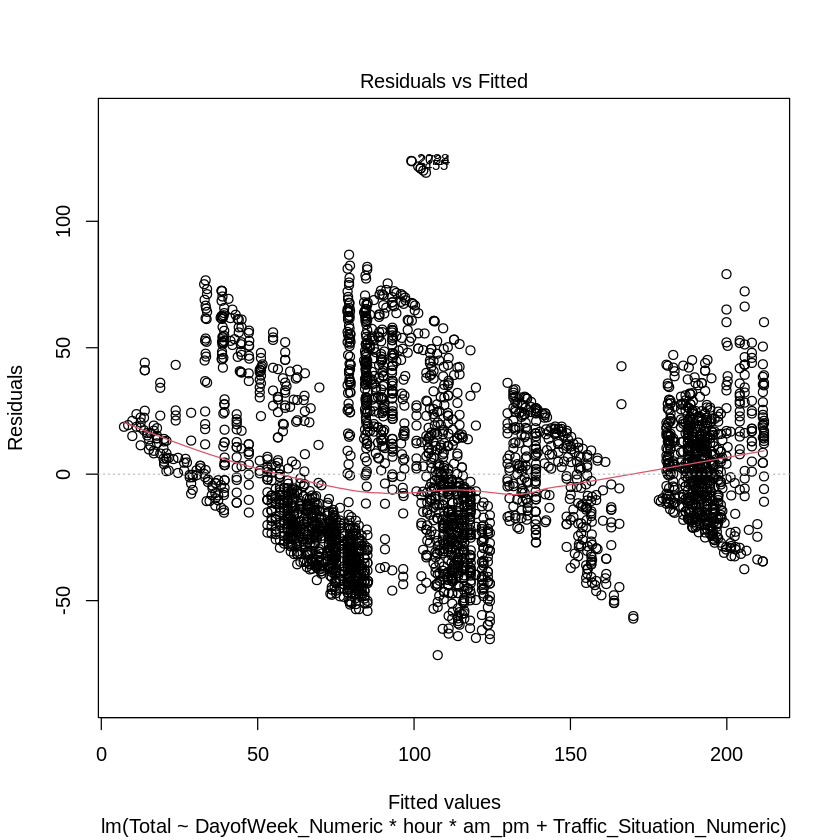

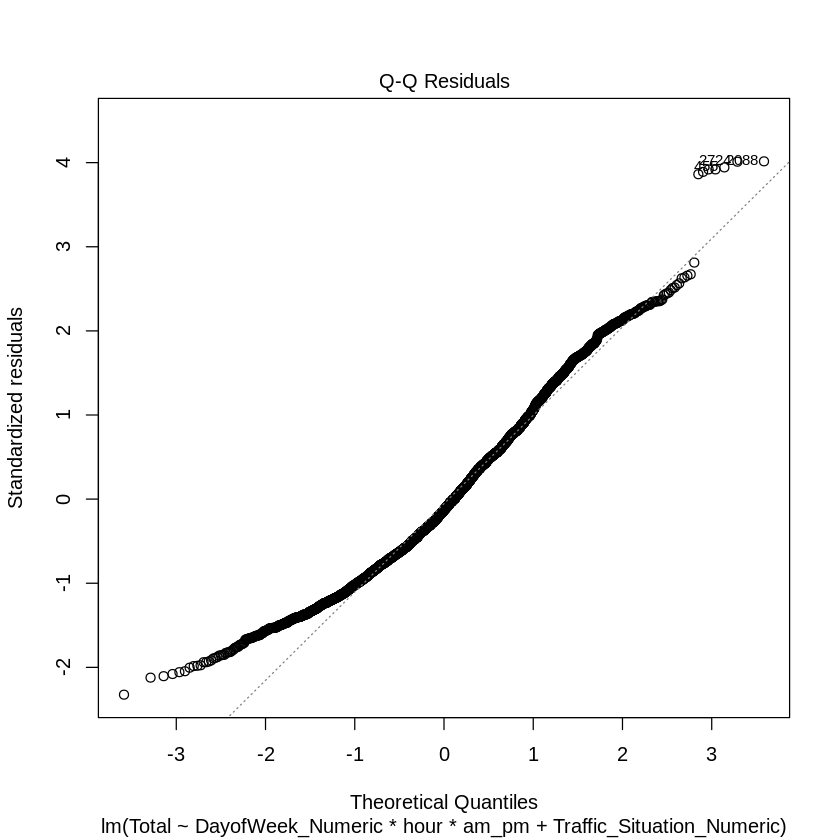

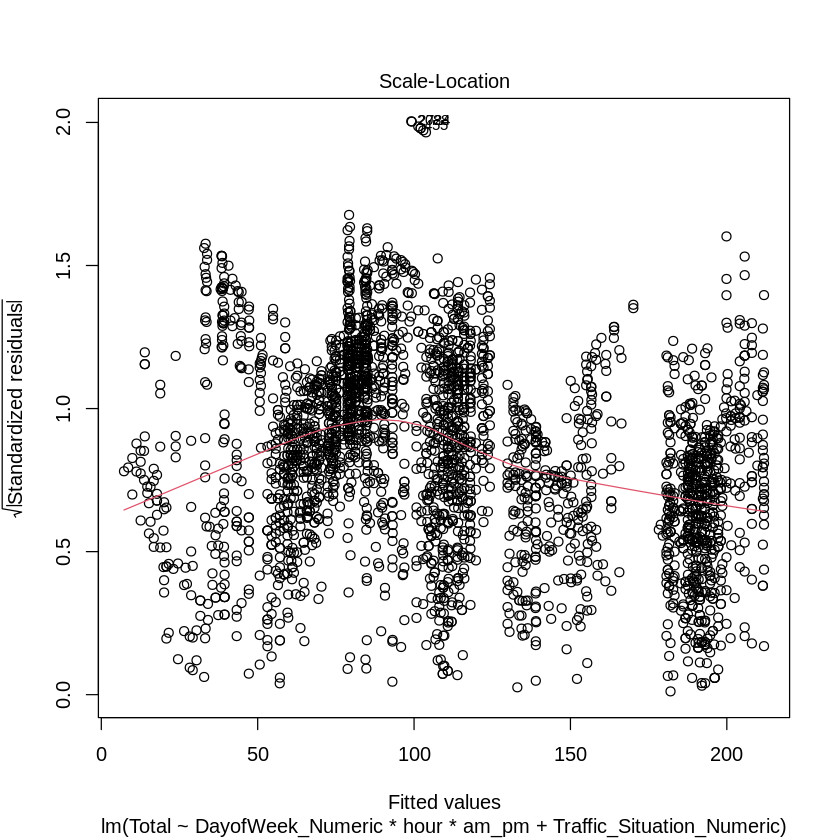

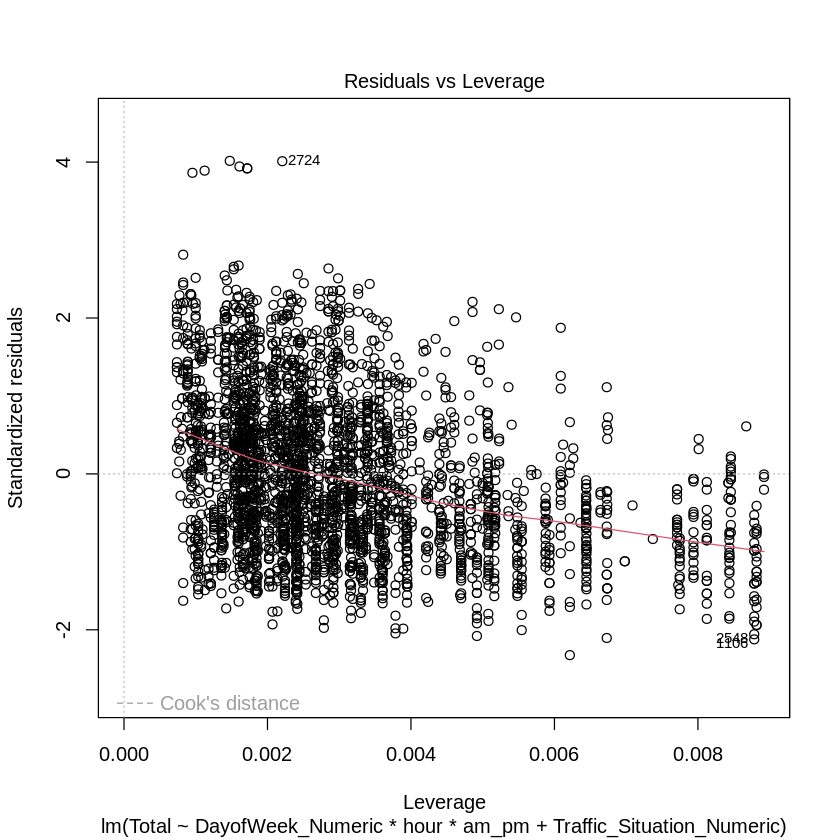

In [ ]:
plot(modelE)

**LR Model Interpretation**

Model E exhibits strong performance, with an R-squared value of 0.7376, indicating that it explains a significant portion of the variance in the target variable. Model E is slightly lower in R-squared but has a similar adjusted R-squared, suggesting it may be a more parsimonious model. Model E has the highest F-statistic, indicating a significant improvement over the null model. Models A, D and E have similar and lower residual standard errors, suggesting better precision. In summary, model E is preferred as it balances good fit (R-squared), simplicity (adjusted R-squared) and predictive power (F-statistic). The small decrease in R-squared compared to Model A is justifiable due to the more parsimonious nature of Model E. However, the differences between models are relatively small and further refinement such as feature engineering, exploring additional variables or trying different algorithms may lead to improved results.



##**Conclusion**


**EDA Conclusion:**


• The traffic data suggests a consistent monthly pattern, indicating a steady flow of vehicles throughout the month.

• Weekdays exhibit higher vehicle volumes compared to weekends, suggesting potential variations in commuter behavior or activities.

• The heavy traffic during working hours (0600 to 1800) highlights the impact of regular working schedules on traffic patterns.



**Modeling Conclusion:**


• Random forest is successfully developed, which can be used to predict and classify traffic situations into distinct levels (low, medium, high, heavy).

• Based on the confusion matrix for both train data model and downsampling data model, both models show strong predictive capabilities for classifying traffic situations. The train data model achieving perfect accuracy and the downsampling data model maintaining high accuracy while addressing class imbalances. These models can serve as valuable tools for predicting and managing traffic situations, but further validation and testing on diverse datasets are recommended for comprehensive assessment and deployment.

• Besides, linear regression is developed, which can be used to accurately forecast the number of vehicles on the roads at specific times.

• In overall, Model E stands as a robust tool for forecasting traffic, offering valuable insights into temporal and situational factors influencing vehicular flow. It proves highly effective in predicting road traffic and showcasing strong explanatory power with an R-squared of 0.7376. Key features like day, hour, and traffic situation are critical and their interactions significantly contribute to accurate predictions. Compared to other models, Model E demonstrates competitive performance. While effective on the evaluated data, ongoing validation and adaptation to diverse datasets are crucial for real-world applicability.